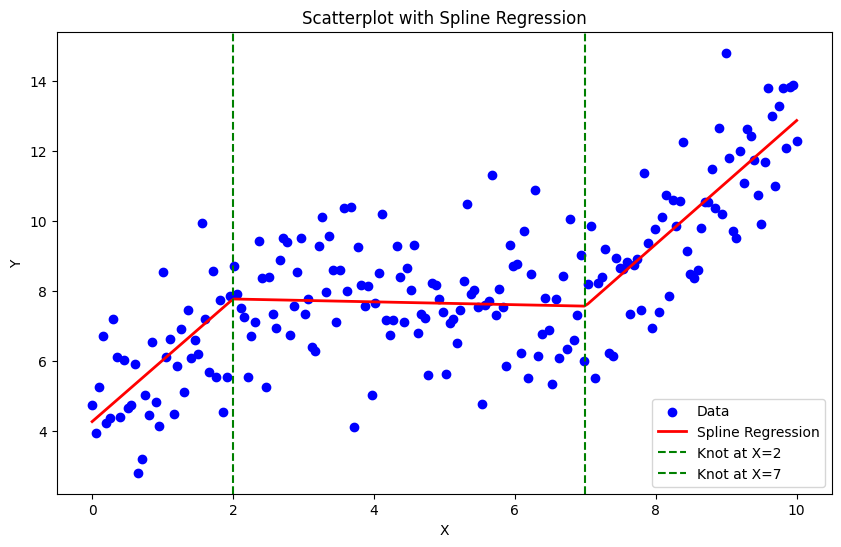

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LSQUnivariateSpline
from sklearn.linear_model import LinearRegression
import patsy

# Simulate data
np.random.seed(42)
X = np.linspace(0, 10, 200)
Y = 4 + 3 * X - 0.7 * X**2 + 0.05 * X**3 + np.random.normal(scale=1.5, size=X.shape)  # Quadratic relationship with noise

# Define the knot for the spline
knot = [2,7]  # One knot at X=5

# Fit a linear regression spline
spline = LSQUnivariateSpline(X, Y, t=knot, k=1)  # k=1 for linear spline

# Predict Y values using the spline
Y_spline = spline(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_spline, color='red', label='Spline Regression', linewidth=2)
plt.axvline(x=knot[0], color='green', linestyle='--', label='Knot at X=2')
plt.axvline(x=knot[1], color='green', linestyle='--', label='Knot at X=7')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Spline Regression')
plt.legend()
plt.show()

In [23]:
spline_alt = patsy.bs(X, df=4, knots=[2,7], degree=2, include_intercept=False)

In [24]:
model = LinearRegression()
model.fit(spline_alt, Y)
Y_pred = model.predict(spline_alt)

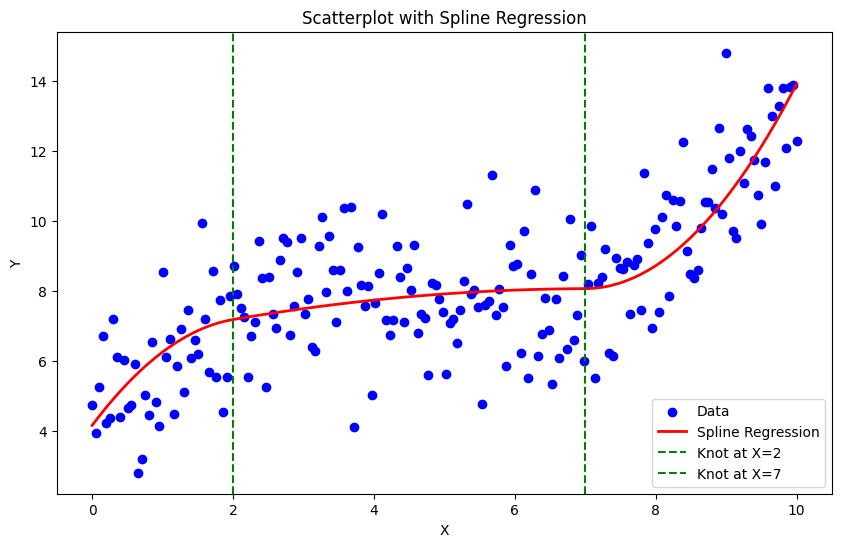

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_pred, color='red', label='Spline Regression', linewidth=2)
plt.axvline(x=knot[0], color='green', linestyle='--', label='Knot at X=2')
plt.axvline(x=knot[1], color='green', linestyle='--', label='Knot at X=7')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Spline Regression')
plt.legend()
plt.show()